In [1]:
import tiiqu
import preprocess
import model_nmf
import hdp_model

In [2]:
df = tiiqu.load_tiiqu_data('nlpdata.csv')
train, test = tiiqu.split(df)
wlist = preprocess.extract_word_list(train)
wlist = preprocess.drop_stopwords(wlist)
wlist_bgrm = preprocess.extract_bigrams(wlist)
dictionary = preprocess.get_dictionary(wlist_bgrm)
bowS = preprocess.get_bow(dictionary, wlist_bgrm)

Fold 1 : #Train items = 741, 	 #Test items = 186
Fold 2 : #Train items = 741, 	 #Test items = 186
Fold 3 : #Train items = 742, 	 #Test items = 185
Fold 4 : #Train items = 742, 	 #Test items = 185
Fold 5 : #Train items = 742, 	 #Test items = 185


# NMF Model

In [25]:
num_topics, scores = model_nmf.num_topics_estimation(bowS, dictionary, wlist_bgrm, 5, 20)

16 topics would be estimated for this data


In [29]:
nmf = model_nmf.NMF(bowS, num_topics, dictionary)
model_nmf.get_coherence(nmf, wlist_bgrm, dictionary)

0.45671

In [30]:
topic_list = nmf.get_topics()
topic_list

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.00025273],
       [0.07756803, 0.04240843, 0.        , ..., 0.        , 0.        ,
        0.00078818],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.12524242, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.01313362, 0.        , 0.00084032, ..., 0.00032663, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.00031099, 0.        ,
        0.        ]])

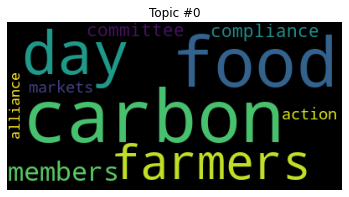

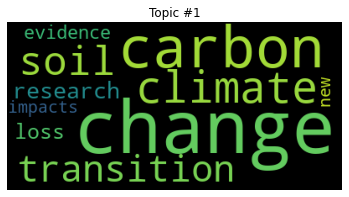

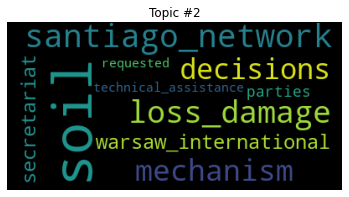

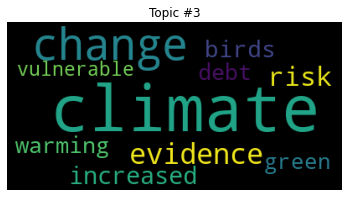

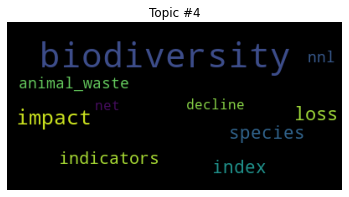

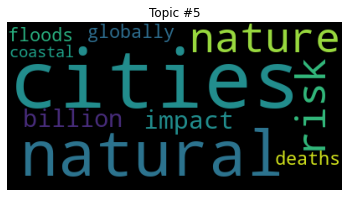

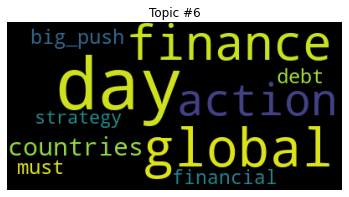

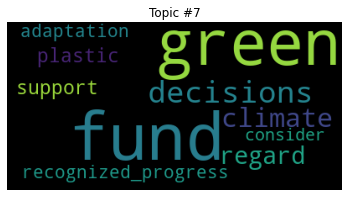

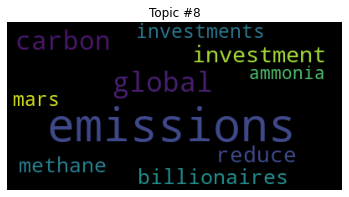

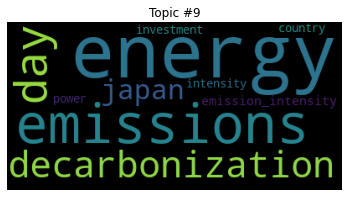

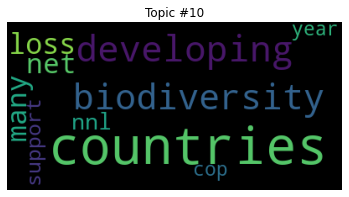

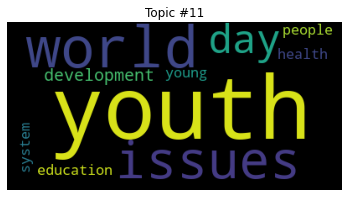

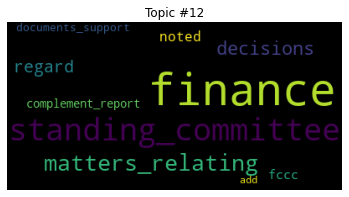

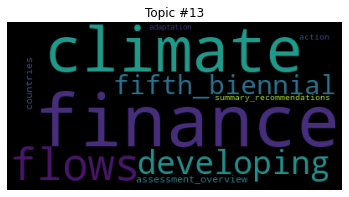

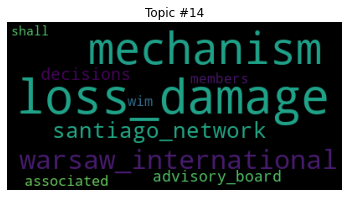

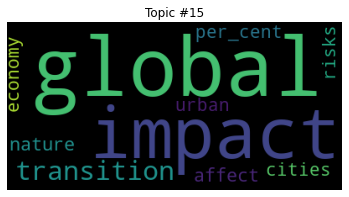

In [31]:
model_nmf.ilustrate_word_clouds(nmf)

# HDP Model

In [3]:
topic_dict = hdp_model.get_model_topics(wlist_bgrm)

Training...
Training...


Model one
Num docs: 742 , Vocab size: 777 , Num words: 10756
Removed top words: ['climate', 'finance', 'biodiversity', 'emissions', 'change', 'day', 'loss']
Iteration: 0	Log-likelihood: -7.287272370938875	Num. of topics: 11
Iteration: 1	Log-likelihood: -6.893069134498006	Num. of topics: 12
Iteration: 2	Log-likelihood: -6.6792361645194935	Num. of topics: 11
Iteration: 3	Log-likelihood: -6.595179633275865	Num. of topics: 11
Iteration: 4	Log-likelihood: -6.547228567504493	Num. of topics: 11
Iteration: 5	Log-likelihood: -6.515709358593397	Num. of topics: 11
Iteration: 6	Log-likelihood: -6.483371691572573	Num. of topics: 12
Iteration: 7	Log-likelihood: -6.4622787354647695	Num. of topics: 12
Iteration: 8	Log-likelihood: -6.442554521423239	Num. of topics: 12
Iteration: 9	Log-likelihood: -6.433744069833035	Num. of topics: 12
Done

Model pmi
Num docs: 742 , Vocab size: 777 , Num words: 10756
Removed top words: ['climate', 'finance', 'biodiversity', 'emissions', 'change', 'day', 'loss']
Iteratio

Training...


Iteration: 0	Log-likelihood: -6.157772840266101	Num. of topics: 17
Iteration: 1	Log-likelihood: -5.937508957751412	Num. of topics: 19
Iteration: 2	Log-likelihood: -5.849108561876827	Num. of topics: 19
Iteration: 3	Log-likelihood: -5.7801203533681695	Num. of topics: 22
Iteration: 4	Log-likelihood: -5.731920403735067	Num. of topics: 22
Iteration: 5	Log-likelihood: -5.725782434319337	Num. of topics: 20
Iteration: 6	Log-likelihood: -5.735662556517505	Num. of topics: 19
Iteration: 7	Log-likelihood: -5.744664049036015	Num. of topics: 18
Iteration: 8	Log-likelihood: -5.751355627608386	Num. of topics: 18
Iteration: 9	Log-likelihood: -5.767057619770129	Num. of topics: 18
Done



In [4]:
for i in range(0,3):
    hdp_model.eval_coherence(topic_dict[i], wlist_bgrm)

Evaluating topic coherence...
0.4684494366019876
Done

Evaluating topic coherence...
0.5662605634248097
Done

Evaluating topic coherence...
0.6486552400090541
Done



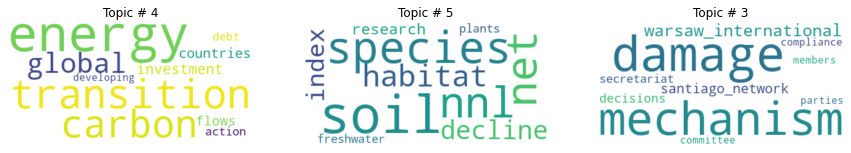

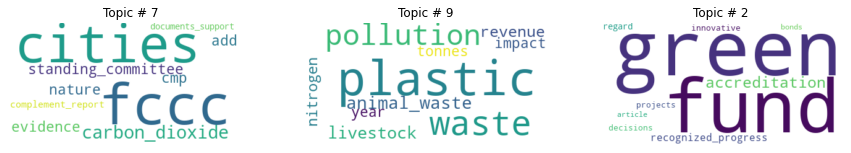

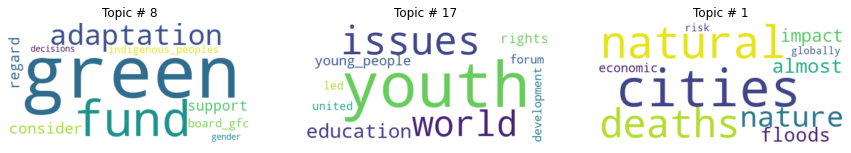

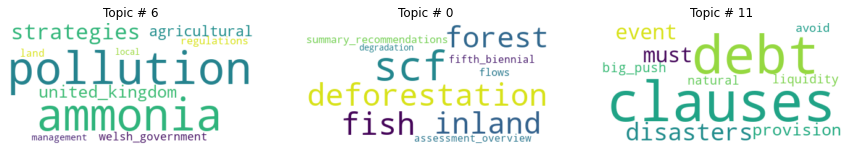

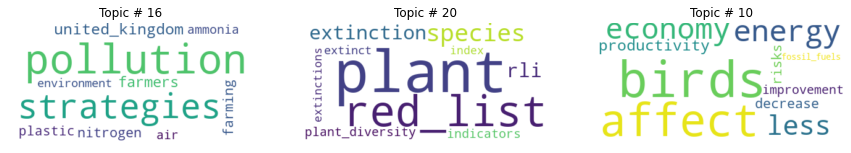

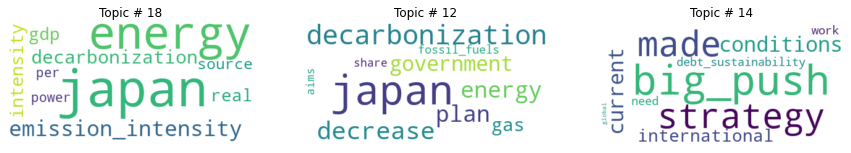

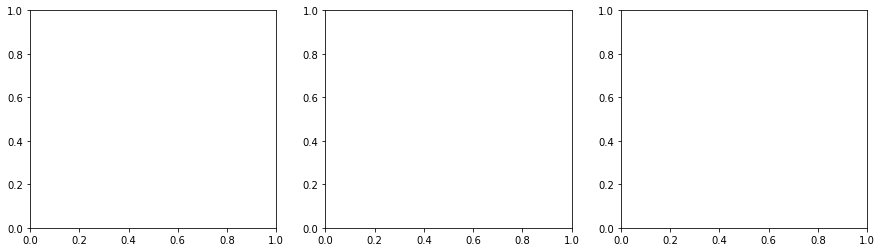

In [5]:
hdp_one, hdp_pmi, hdp_idf = hdp_model.load_hdp_models()
hdp_model.hdp_topics_to_wordclouds(hdp_idf, topic_dict[2])